# Polynomial regression

In [1]:
import numpy as np
import numpy.random as rnd
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

### Let's generate some random nonlinear data and plot it

In [2]:
m = 500
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

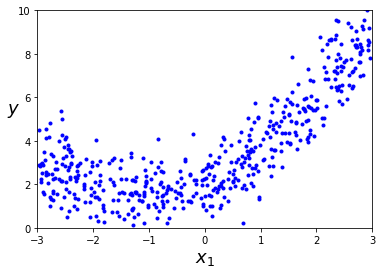

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#### How many features in this dataset?
    1
#### Is this discrete or continuous data?
    continous
#### What type of ML algorithm should we use?
    polynomial

### Now do a linear regression on this data

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.61037052]), array([[1.00688202]]))

### What do these outputs tell me? What is the model equation?

$y = 3.61 + 1.0068 x_1$

### Plot the linear fit

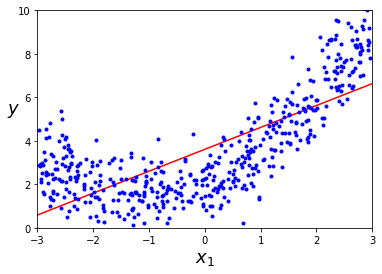

In [5]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new=lin_reg.intercept_ + X_new*lin_reg.coef_ 

plt.plot(X_new,y_new, "r-")

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


### How did we do? What are the issues here?

In [6]:
from sklearn.metrics import mean_squared_error

# See how our model predicted on the training data
y_train = lin_reg.predict(X)
mean_squared_error(y,y_train)

2.6845960746947233

In [7]:
X.shape

(500, 1)

### Now let's try a polynomial fit

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# create an array with the new polynomial features (stores X and X^2 and cross terms if needed)
X_poly_two = poly_features.fit_transform(X)


In [9]:
print('Original Feature Data: \n', X[0])
print('Polynomial Feature Data: \n', X_poly_two[0])

Original Feature Data: 
 [-0.75275929]
Polynomial Feature Data: 
 [-0.75275929  0.56664654]


#### Notice that PolynomialFeatures creates all of the features that you need. 

- How many would you get if you did poly_features = PolynomialFeatures(degree=3, include_bias=False) on this one feature data set? \
    3

- How many features would you get if you did poly_features = PolynomialFeatures(degree=2, include_bias=False) on a two feature data set? \
   

### CAUTION:
Notice that polynomial features takes an array of size $n$ and transforms it in to an array of $$\frac{(n+d)!}{d!n!}$$

This is a "combinatorial explosion of the number of features!" (quote from the book)

In [10]:
from sklearn.preprocessing import StandardScaler

# Here we do a linear fit of our polynomial features after we normalize
scale = StandardScaler()
X_poly_two_norm = scale.fit_transform(X_poly_two)

lin_reg.fit(X_poly_two_norm, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.60168141]), array([[1.85550823, 1.29891254]]))

### What do these outputs tell me? What is the model equation?

### Plot the Polynomial Fit

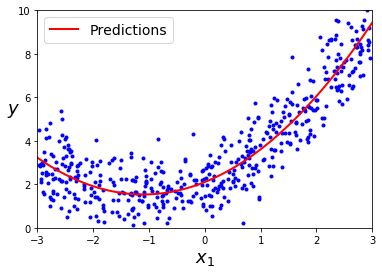

In [11]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)


X_new_poly = poly_features.transform(X_new)
X_new_poly_norm = scale.transform(X_new_poly)

y_new_poly = lin_reg.predict(X_new_poly_norm)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### How did we do?

In [12]:
# See how our model predicted on the training data
y_train_poly = lin_reg.predict(X_poly_two_norm)
mean_squared_error(y,y_train_poly)

1.0002153748728417

### Wait! If second degree (r=2) is better wouldn't even larger r values be BEST?!?

### Let's try even higher degree!! r=300

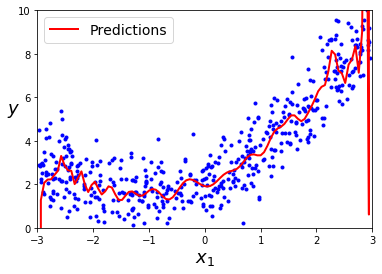

In [13]:
from sklearn.pipeline import Pipeline
# Pipeline lets me do multiple regression jobs at once!

# Define all the functions you want to apply
poly_features = PolynomialFeatures(degree=300, include_bias=False)
scale = StandardScaler()
lin_reg = LinearRegression()

# Define the regression using the pipeline
polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("scale", scale),
            ("lin_reg", lin_reg),
        ])

polynomial_regression.fit(X, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new_poly = polynomial_regression.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### How did we do?

In [14]:
# See how our model predicted on the training data
y_train_poly = polynomial_regression.predict(X)
mean_squared_error(y,y_train_poly)

0.8816545413434133

### THIS IS BETTER, RIGHT? Is it really better?

### Let's compare these

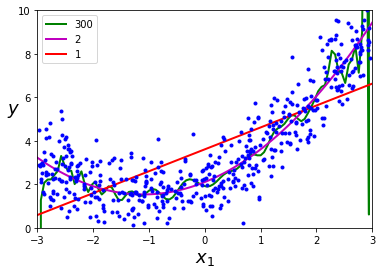

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 2, 300), ("m-", 2, 2), ("r-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=1)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

### A BIG IDEA - You want to get a model that fits your data well, but not so well that it can't be used for predictions!!!

# Underfit 
- the model is not matching the shape of the data, you assumed the wrong shape for F(x). High error when on the training data so the model just doesn't work, it won't be usefull on new data.

# Overfit 
- the model goes exactly through a lot of points, low error on the training data. BUT, you have effectively memorized your data, so this model will not generalize well to new data.

### Learning curves can help you decide if you are under vs. over fitting. 

- You can use cross-validation to get an estimate of how well your model is doing and measure how well your model generalizes to new data. 

- Learning curves are a plot of the models performance and training and validation sets as you change the size of the training set.

- Preforms well in training but generalizes poorly = overfit (too complex)

- Preforms poorly in raining and does not generalize = underfit (too simple)

In [16]:
from sklearn.model_selection import train_test_split

# This function will plot learning curves for you
# It uses train_test_split which automaticaly gives you a random split of your data 
# into testing and validation groups
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        # Fit the model to the first m elements of the training set
        model.fit(X_train[:m], y_train[:m])
        # Predict from the first m elements of the training set
        y_train_predict = model.predict(X_train[:m])
        # Predict from the validation set
        y_val_predict = model.predict(X_val)
        # Calculate the training error
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        # Calculate the validation error
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # Plot the resulting curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

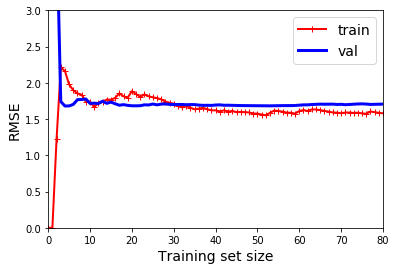

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()                                     

#### What are the important fetures of this graph:

- We see that as we train with more data the model gets better at predicting the training data (red), but reaches a plateau at a fairly high error. 

- The models ability to predict on the validation set (blue) gets better as it trains, but this curve also has a plateau at about the same error.

- The model is not getting better as we train with more data so this implies that we just can't find a linear fit that does much better, maybe the linear assumption was not good.

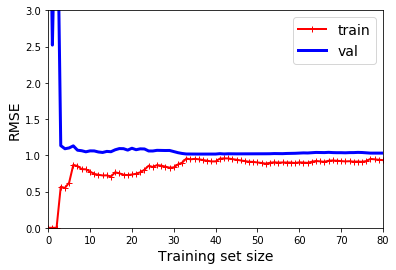

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
plt.show()                      

#### What are the important fetures of this graph:

- We see that as we train with more data the model gets better at predicting the training data (red). I continues getting slowly better as we train with more data.

- The models ability to predict on the validation set (blue) gets better as it trains.

- As we are training more the model gets better and better, until some point when we are basically over-training. The underlying polynomial assumption is working quite well.

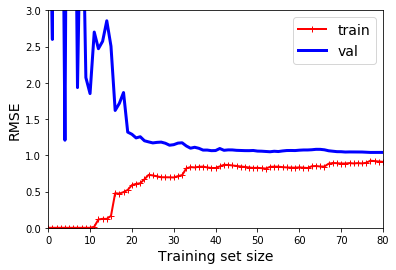

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])          
plt.show()  

#### What are the important fetures of this graph:

- We see that as we train with more data the model gets better at predicting the training data (red). 

- The models ability to predict on the validation set (blue) is really sporatic and just never gets very good. There is a bigger gap between the training curve and the validation curve meaning that the model is predicting the training data much better than the validation data.

- We basically just picked a high order polynomial that went through all the given training points, it will not do better at predicting new points.

- We could just keep feeding this model more and more data until the validaion error gets much closer to the training error.

### How would we apply this to Logistic Regression?

In last nights homework, how did logistic regression work no the second data set?

[0.0174072]
[[0.26541433 0.01162176]]


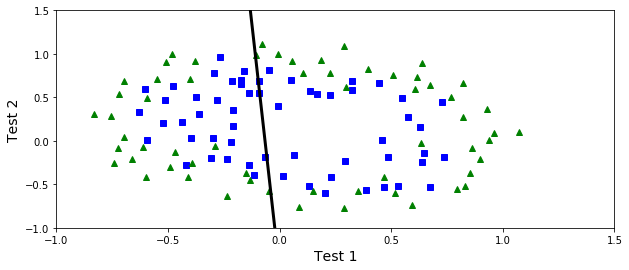

True     64
False    54
Name: stat_faulty, dtype: int64

In [20]:
URL = 'http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv'
df = pd.read_csv(URL)
df.head()

X=df[['Test 1','Test 2']].to_numpy()

pd.get_dummies(df,prefix=['stat']).head()
y=pd.get_dummies(df,prefix=['stat'])['stat_faulty']

from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)
print(log_reg.intercept_)
print(log_reg.coef_)

## Graph the data points, differentating between 0 class and 1 class
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

## plot decision boundary
left_right = np.array([-1, 1])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k", linewidth=3)

## Label the graph
#plt.text(80, 100, "admitted", fontsize=14, color="g", ha="center")
#plt.text(40, 30, "not admitted", fontsize=14, color="b", ha="center")
plt.xlabel("Test 1", fontsize=14)
plt.ylabel("Test 2", fontsize=14)
plt.axis([-1, 1.5, -1, 1.5])
plt.show()

y_pred=log_reg.predict(X)
score=(y_pred==y)
score.value_counts()

### What was our first mistake?

### Try again but with logistic regression and a second order polynomial

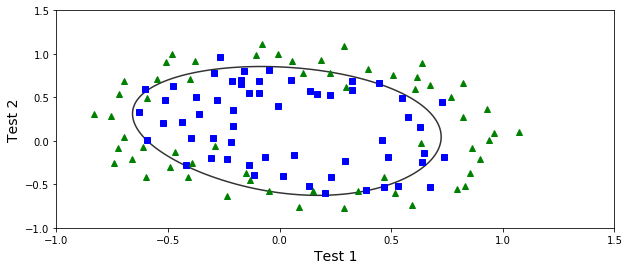

True     95
False    23
Name: stat_faulty, dtype: int64

In [21]:
# The only real change is that I called Polynomial Features to force a nonlinear decision boundary

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("log_reg", LogisticRegression(solver='lbfgs')),
    ])

polynomial_regression.fit(X,y)

## Graph the data points, differentating between 0 class and 1 class
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

## plot decision boundary 
## -- thanks to --
## https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
xx, yy = np.mgrid[-1:5:.01, -1:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = polynomial_regression.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
#OR#
#plt.contourf(xx, yy, probs, 25, cmap="PuOr",vmin=0, vmax=1)
#plt.colorbar()

## Label the graph
plt.xlabel("Test 1", fontsize=14)
plt.ylabel("Test 2", fontsize=14)
plt.axis([-1, 1.5, -1, 1.5])
plt.show()

y_pred=polynomial_regression.predict(X)
score=(y_pred==y)
score.value_counts()

 ### How did we do? Is this better than linear? Better than higher order polynomial?
 
 Can we use mean squared error in this case to plot learning curves for different order polynomials?

### Measuring errror can be tricky. Really depends on the definition of the problem.

We will talk more about this idea as it pertains to classification later in class!

### ROC curves are just one way to visualize this.

- Plots the FALSE positive rate (FPR) vs the TRUE positive rate (TPR)
- Best Case: TPR=1 FPR=0 - you got 100% correct
- Worst Case: TPR=0 FPR=1 - you got 100% wrong
- TPR=.5 and FPR=.5 - this is no better than taking a random guess between 0 and 1

OTHER NOTES - in the plot below we plotted the outcome assuming our decision boundary is when the probability is exactly 0.5, but we could change this assumption and see how changing our cutoff effects the FPR vs TPR curve.

In [22]:
# This function will plot ROC point for a simple two class system assuming a standard cutoff of 0.5
from sklearn.metrics import roc_curve

def plot_ROC_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
        
    y_score = model.fit(X_train, y_train).predict(X_val)
        
    # Compute ROC curve and ROC area for each class

    fpr, tpr, _ = roc_curve(y_val, y_score)
    
    # Plot the resulting curves
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, 'ro', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show() 
    
    print(fpr[1],tpr[1])

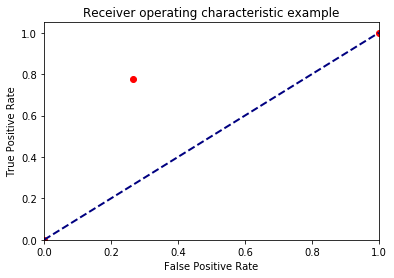

0.26666666666666666 0.7777777777777778


In [23]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("log_reg", LogisticRegression(solver='lbfgs')),
    ])

plot_ROC_curves(polynomial_regression, X, y)
     


### Plot of the full ROC curve

In [24]:
# This function will plot ROC curves for a simple two class system
from sklearn.metrics import roc_curve

def plot_ROC_curves_full(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
        
    y_score = model.fit(X_train, y_train).decision_function(X_val)
        
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_val, y_score)

    
    # Plot the resulting curves
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, 'ro-', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show() 

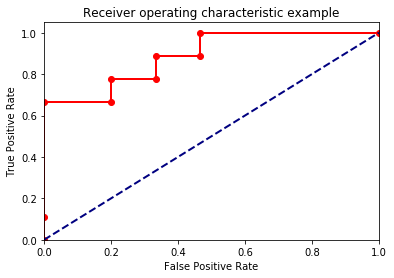

In [25]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("log_reg", LogisticRegression(solver='lbfgs')),
    ])

plot_ROC_curves_full(polynomial_regression, X, y)

From left to right along the red curve we are decreasing the probability cutoff. 

If we use a very high cutoff (eg. prob > .7 then we classify as true) then we have very few false positives but we would also miss some of the true positives.

If we use a very low cutoff (eg. prob > .3 then we classify as true) then we have lots of false positives but were sure to also get all of the true negatives. 



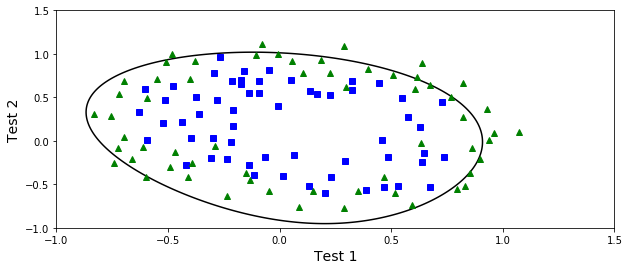

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.contour(xx, yy, probs, levels=[.7], cmap="Greys", vmin=0, vmax=.6)

## Label the graph
plt.xlabel("Test 1", fontsize=14)
plt.ylabel("Test 2", fontsize=14)
plt.axis([-1, 1.5, -1, 1.5])
plt.show()

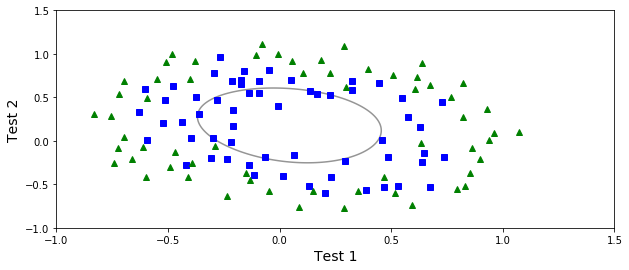

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.contour(xx, yy, probs, levels=[.3], cmap="Greys", vmin=0, vmax=.6)

## Label the graph
plt.xlabel("Test 1", fontsize=14)
plt.ylabel("Test 2", fontsize=14)
plt.axis([-1, 1.5, -1, 1.5])
plt.show()